In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv("/home/charumathi/Desktop/Sem-6/ML-lab/A4/archive-mnist-csv/mnist_train.csv") 
test_data = pd.read_csv("/home/charumathi/Desktop/Sem-6/ML-lab/A4/archive-mnist-csv/mnist_test.csv")

In [5]:
train_data.shape

(60000, 785)

In [6]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(10000, 785)

In [8]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [10]:
test_data.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [11]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [12]:
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(train_data.columns)
print(test_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [14]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<Axes: ylabel='count'>

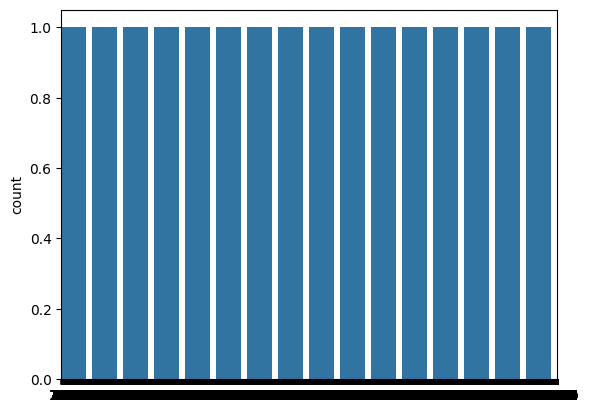

In [15]:
sns.countplot(train_data['label'])

Text(0.5, 1.0, 'Digit 8')

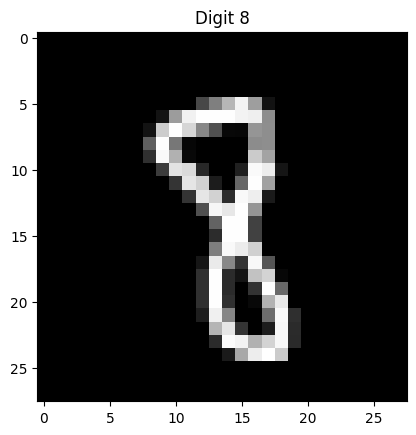

In [ ]:
img1 = train_data.iloc[876, 1:]
img1.shape
img1 = img1.values.reshape(28,28)
plt.imshow(img1, cmap='gray')
plt.title("Digit 8",)

Text(0.5, 1.0, 'Digit 3')

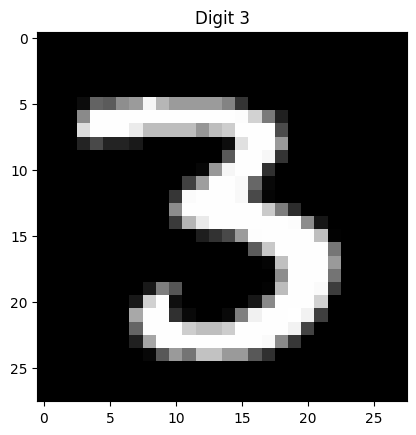

In [ ]:
img2 = train_data.iloc[12, 1:]
img2.shape
img2 = img2.values.reshape(28, 28)
plt.imshow(img2, cmap='gray')
plt.title("Digit 3")

In [ ]:
round(train_data.drop('label', axis=1).mean(), 2)

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [ ]:
y = train_data['label']
X = train_data.drop(columns = 'label')

print(train_data.shape)

(60000, 785)


In [ ]:
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (60000, 784)
test_data: (10000, 785)


In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3 ,random_state = 10)

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_linear = model_linear.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accu_linear = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear)
print("accuracy:", accu_linear, "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_linear))

accuracy: 0.9173333333333333 

[[1704    0   15    6    3   20   14    1    6    3]
 [   1 1952   10    5    2    3    0    2   15    2]
 [  12   33 1655   36   22    9   21   15   25    3]
 [   9    6   46 1643    5   67    1   11   37    9]
 [   6    9   23    1 1651    5   10    8    6   53]
 [  19    6   12   70   12 1453   22    2   40   16]
 [  18    5   21    1   15   19 1673    0    5    0]
 [   7   12   26    9   35    6    2 1789    6   72]
 [  21   30   48   67    7   41   16    7 1477   10]
 [   5    2   14   16   66    9    2   50   23 1515]]


In [ ]:
model_rbf = SVC(kernel ='rbf', random_state = 0)
model_rbf.fit(X_train, y_train)

# predict
y_pred_rbf = model_rbf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accu_rbf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf)
print("accuracy:", accu_rbf, "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.962 

[[1736    0    6    2    0    4   11    6    6    1]
 [   1 1957   13    5    2    0    1    8    4    1]
 [   6    3 1776   10    7    3    5   16    4    1]
 [   1    0   31 1733    3   21    2   19   19    5]
 [   1    4   16    1 1696    3    9    3    7   32]
 [   5    3    8   26    3 1562   15   18    9    3]
 [   7    3    7    0    3   11 1715    6    5    0]
 [   2    7   16    5   16    0    0 1888    2   28]
 [   4   13   17   11    4   12   11    8 1637    7]
 [   1    2    8   11   19    4    0   32    9 1616]]


In [ ]:
model_sigmoid = SVC(kernel ='sigmoid')
model_sigmoid.fit(X_train, y_train)

# predict
y_pred_sigmoid = model_sigmoid.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accu_sigmoid = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sigmoid)
print("accuracy:", accu_sigmoid, "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_sigmoid))

accuracy: 0.8898888888888888 

[[1683    0   22    5    4   22   19    1   15    1]
 [   0 1943   17   10    3    8    1    2    7    1]
 [  33   24 1538   49   20    9   93    8   34   23]
 [  19    3   67 1583    4   84    8   22   29   15]
 [   2    9   26    5 1617    5   19   11    4   74]
 [  38   15   29   67   17 1386   24    2   55   19]
 [  30   13   57    1   18   29 1599    1    9    0]
 [   8   12   32   28   20    5    4 1733    4  118]
 [  24   51   37   41    7   61   12    7 1463   21]
 [   5    6   31   18   68    9    0   73   19 1473]]


In [ ]:
model_poly = SVC(kernel ='poly', degree = 4)
model_poly.fit(X_train, y_train)

# predict
y_pred_poly = model_poly.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
accu_poly = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly)
print("accuracy:", accu_poly, "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_poly))

accuracy: 0.8664444444444445 

[[1583    0    4    3    3    1    9    2  167    0]
 [   0 1921    9    2    9    0    0    1   50    0]
 [   3    4 1439    9   26    0    8    3  337    2]
 [   1    2   14 1425    2   14    3    8  358    7]
 [   1    4   14    1 1669    3    2    2   37   39]
 [   2    2    2   26    5 1210    9    1  376   19]
 [   3    4    4    0    9    5 1558    0  174    0]
 [   1   15    2    3   55    2    0 1561  182  143]
 [   2    6    3   10    5    7    1    1 1680    9]
 [   1    2    5    2   55    4    0   15   68 1550]]


In [ ]:
func = ['Linear','Radial Basis Function','Sigmoid','Polynomial']
y_preds = [accu_linear,accu_rbf,accu_sigmoid,accu_poly]

x = func
y = y_preds
res = pd.DataFrame({"Kernel": x, "Accuracy": y})
print(res)

                  Kernel  Accuracy
0                 Linear  0.917333
1  Radial Basis Function  0.962000
2                Sigmoid  0.889889
3             Polynomial  0.866444
